In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [3]:
df=pd.DataFrame()

In [4]:
for i in range(1,12):
    archivo='Datasets/Google Maps/metadata-sitios/1.json'.replace('1',str(i))
    df1=pd.read_json(archivo,lines=True)
    df=pd.concat([df,df1])

In [5]:
df.reset_index(drop=True,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3025011 entries, 0 to 3025010
Data columns (total 15 columns):
 #   Column            Dtype  
---  ------            -----  
 0   name              object 
 1   address           object 
 2   gmap_id           object 
 3   description       object 
 4   latitude          float64
 5   longitude         float64
 6   category          object 
 7   avg_rating        float64
 8   num_of_reviews    int64  
 9   price             object 
 10  hours             object 
 11  MISC              object 
 12  state             object 
 13  relative_results  object 
 14  url               object 
dtypes: float64(3), int64(1), object(11)
memory usage: 346.2+ MB


In [7]:
df.isnull().sum()

name                     37
address               80511
gmap_id                   0
description         2770722
latitude                  0
longitude                 0
category              17419
avg_rating                0
num_of_reviews            0
price               2749808
hours                787405
MISC                 690834
state                746455
relative_results     295058
url                       0
dtype: int64

In [8]:
df_data=df.drop_duplicates(subset='gmap_id',keep='first')
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2998428 entries, 0 to 3025010
Data columns (total 15 columns):
 #   Column            Dtype  
---  ------            -----  
 0   name              object 
 1   address           object 
 2   gmap_id           object 
 3   description       object 
 4   latitude          float64
 5   longitude         float64
 6   category          object 
 7   avg_rating        float64
 8   num_of_reviews    int64  
 9   price             object 
 10  hours             object 
 11  MISC              object 
 12  state             object 
 13  relative_results  object 
 14  url               object 
dtypes: float64(3), int64(1), object(11)
memory usage: 366.0+ MB


In [9]:
df_data.drop(columns=['description','price','state'],inplace=True)

C:\Users\juan\AppData\Local\Temp\ipykernel_10436\1059316461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data.drop(columns=['description','price','state'],inplace=True)


In [10]:
df_data.head(3)

,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,hours,MISC,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,32.388300,-83.35710,[Pharmacy],4.9,16,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...","{'Service options': ['In-store shopping', 'Sam...","[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,34.018891,-118.21529,[Textile exporter],4.5,6,None,None,"[0x80c2c624136ea88b:0xb0315367ed448771, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,34.058092,-118.29213,[Korean restaurant],4.4,18,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...","[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...


In [11]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2998428 entries, 0 to 3025010
Data columns (total 12 columns):
 #   Column            Dtype  
---  ------            -----  
 0   name              object 
 1   address           object 
 2   gmap_id           object 
 3   latitude          float64
 4   longitude         float64
 5   category          object 
 6   avg_rating        float64
 7   num_of_reviews    int64  
 8   hours             object 
 9   MISC              object 
 10  relative_results  object 
 11  url               object 
dtypes: float64(3), int64(1), object(8)
memory usage: 297.4+ MB


In [12]:
df_data=df_data.explode('category')

In [26]:
df_data.to_parquet('Datasets/Google Maps/metadata-sitios/metadata-sitios.parquet')

In [13]:
prueba=df_data.copy()

In [14]:
# Calcula las 10 categorías más frecuentes
top10_categories = df_data['category'].value_counts().index[:10]

# Filtra el DataFrame para incluir solo las categorías en top10_categories
df_top10 = df_data[df_data['category'].isin(top10_categories)]



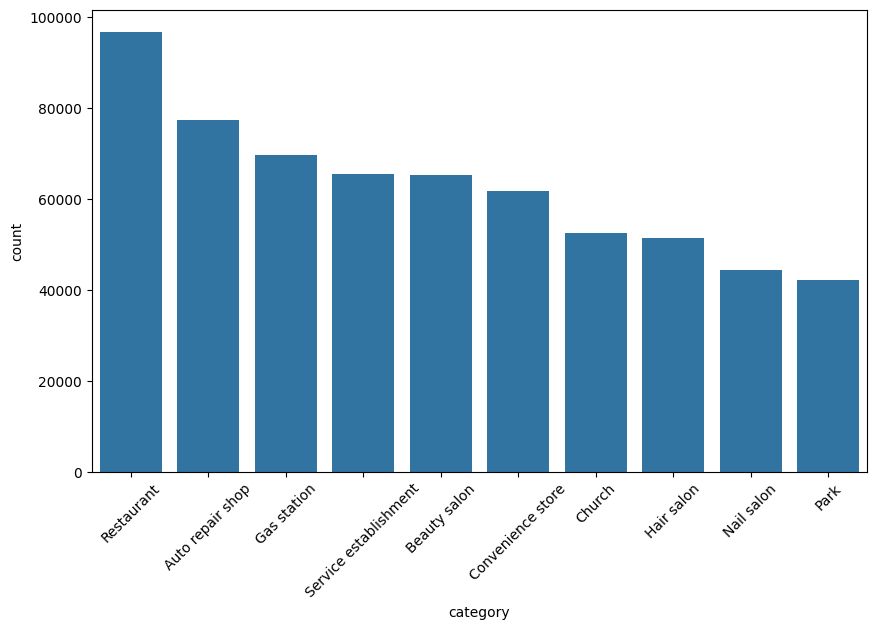

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top10, x='category', order=top10_categories)
plt.xticks(rotation=45)
plt.show()

In [16]:
top10_reviews=df_data['num_of_reviews'].value_counts().sort_values(ascending=True).index[:10]

df_top10_reviews=df_data[df_data['num_of_reviews'].isin(top10_reviews)]

In [17]:
df_top10_reviews.sort_values(by='num_of_reviews',ascending=False,inplace=True)

C:\Users\juan\AppData\Local\Temp\ipykernel_10436\1362671292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top10_reviews.sort_values(by='num_of_reviews',ascending=False,inplace=True)


In [18]:
df_top10_reviews

,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,hours,MISC,relative_results,url
2110477,The Streets at Southpoint,"The Streets at Southpoint, 6910 Fayetteville R...",0x89ace8b863a773e5:0xb8ac513d6a603de2,35.904441,-78.941610,Shopping mall,4.5,7797,"[[Sunday, 12–6PM], [Monday, 11AM–7PM], [Tuesda...","{'Service options': ['In-store shopping'], 'Hi...","[0x89ace8b70693b3c7:0xdd3f58fafb91cee1, 0x89ac...",https://www.google.com/maps/place//data=!4m2!3...
2160094,Pappadeaux Seafood Kitchen,"Pappadeaux Seafood Kitchen, 76 NE Interstate 4...",0x865c6000e4df2c61:0xe0785e940a308426,29.519624,-98.488148,Seafood restaurant,4.5,6688,"[[Saturday, 11AM–10PM], [Sunday, 11AM–9PM], [M...","{'Service options': ['Outdoor seating', 'Curbs...","[0x865cf5f878acb285:0x4c70ceb68c9c4cc3, 0x865c...",https://www.google.com/maps/place//data=!4m2!3...
2160021,Carlsbad Premium Outlets,"Carlsbad Premium Outlets, 5620 Paseo Del Norte...",0x80dc72fb37895853:0xb4f60b7ac07956f2,33.126386,-117.321079,Outlet mall,4.3,6611,"[[Saturday, 10AM–8PM], [Sunday, 12–6PM], [Mond...","{'Service options': ['In-store shopping'], 'Ac...","[0x80dc71890ff40c13:0x61f48bacf713a5ee, 0x80dc...",https://www.google.com/maps/place//data=!4m2!3...
2159744,Town Center at Aurora,"Town Center at Aurora, 14200 E Alameda Ave, Au...",0x876c62c2bf7d1e69:0x331569f9bb120abd,39.708258,-104.823209,Shopping mall,4.0,5562,"[[Saturday, 10AM–8PM], [Sunday, 12–6PM], [Mond...","{'Service options': ['In-store shopping'], 'Hi...","[0x876c62ea22a8182d:0x6af3e1440bfe48fb, 0x876c...",https://www.google.com/maps/place//data=!4m2!3...
1990956,McCreless Corner Shopping Center,"McCreless Corner Shopping Center, 3524 S New B...",0x865cf7b457bc4157:0x71c184c4608161e7,29.378377,-98.458972,Shopping mall,4.3,4809,"[[Thursday, 11AM–9PM], [Friday, 11AM–9PM], [Sa...","{'Service options': ['In-store shopping'], 'Ac...","[0x865c58aa91580159:0x97e73f464cb7bf2f, 0x865c...",https://www.google.com/maps/place//data=!4m2!3...
2159524,Pappasito's Cantina,"Pappasito's Cantina, 10501 I-10 W, San Antonio...",0x865c60cba451733b:0x8f11fb8b6eedc74a,29.539233,-98.568874,Mexican restaurant,4.3,3465,"[[Saturday, 11AM–10PM], [Sunday, 11AM–9PM], [M...","{'Service options': ['Outdoor seating', 'Curbs...","[0x865c60a0c75c17a7:0x8370025ad9f607cd, 0x865c...",https://www.google.com/maps/place//data=!4m2!3...
1990796,H-E-B,"H-E-B, 5910 Babcock Rd, San Antonio, TX 78240",0x865c676f33d9fee3:0x4160d6ce82e2c29c,29.526685,-98.603637,Grocery store,4.6,3363,"[[Thursday, 6AM–11PM], [Friday, 6AM–11PM], [Sa...","{'Service options': ['Curbside pickup', 'No-co...","[0x865c437558675f35:0x648748588d52d46d, 0x865c...",https://www.google.com/maps/place//data=!4m2!3...
2073840,"Fiesta Mart, LLC","Fiesta Mart, LLC, 1300 E Pioneer Pkwy, Arlingt...",0x864e87f854434845:0xb47c9dbde98bb3b7,32.707166,-97.090470,Grocery store,4.0,3301,"[[Tuesday, 7AM–11PM], [Wednesday, 7AM–11PM], [...","{'Service options': ['In-store pick-up', 'In-s...","[0x864e7d86bbac96a7:0x753da24e6feec4a8, 0x864e...",https://www.google.com/maps/place//data=!4m2!3...
2095176,Nalley Honda,"Nalley Honda, 4197 Jonesboro Rd, Union City, G...",0x88f4e6a0d71183d1:0x69962cc97ee05b94,33.568579,-84.524349,Honda dealer,4.5,2664,"[[Sunday, 12–5PM], [Monday, 7AM–7PM], [Tuesday...","{'Service options': ['In-store shopping'], 'Ac...","[0x88f4f92f41976be3:0x547192ca25c08f01, 0x88f5...",https://www.google.com/maps/place//data=!4m2!3...
1807804,Hibachi Grill & Supreme Buffet,"Hibachi Grill & Supreme Buffet, 1026 S Sable B...",0x876c6294fd4e5cbd:0x5f6b11e8e26efd89,39.698191,-104.818165,Buffet restaurant,3.8,2146,"[[Monday, 11AM–10PM], [Tuesday, 11AM–10PM], [W...","{'Service options': ['Delivery', 'Takeaway', '...","[0x876c62ca9b7335a9:0x8db9548185a5edad, 0x876c...",https://www.google.com/maps/place//data=!4m2!3...


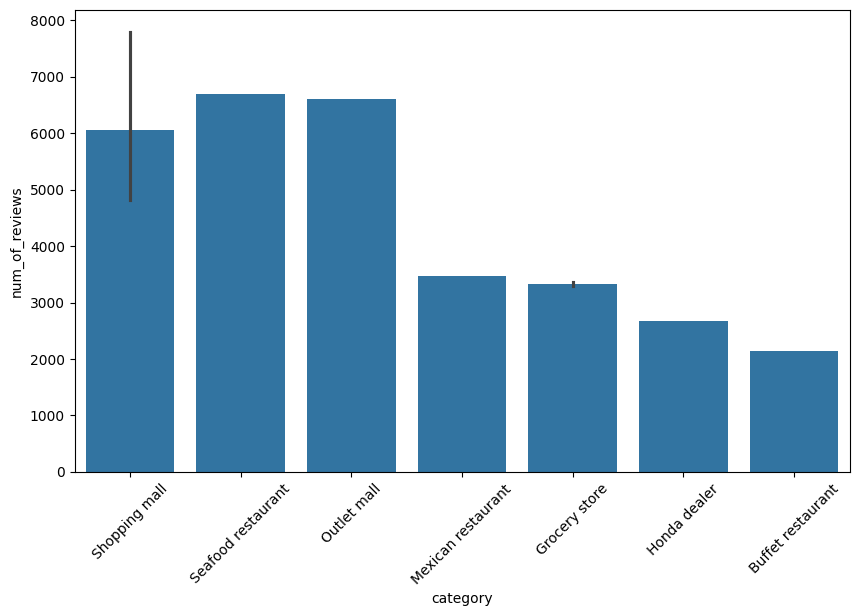

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_top10_reviews, x='category', y='num_of_reviews')
plt.xticks(rotation=45)
plt.show()

In [20]:
promedios=df_data['avg_rating'].groupby(df_data['category']).mean().sort_values(ascending=True)

In [21]:
promedios

category
Cranes                           1.0
Practitioner service location    1.0
Water companies                  1.3
Recycling collection company     1.8
Customs boundary line            1.8
                                ... 
Concierge desk                   5.0
Motorcycle training centre       5.0
Cured ham warehouse              5.0
Online share trading center      5.0
Trolleybus stop                  5.0
Name: avg_rating, Length: 4471, dtype: float64

<Axes: ylabel='category'>

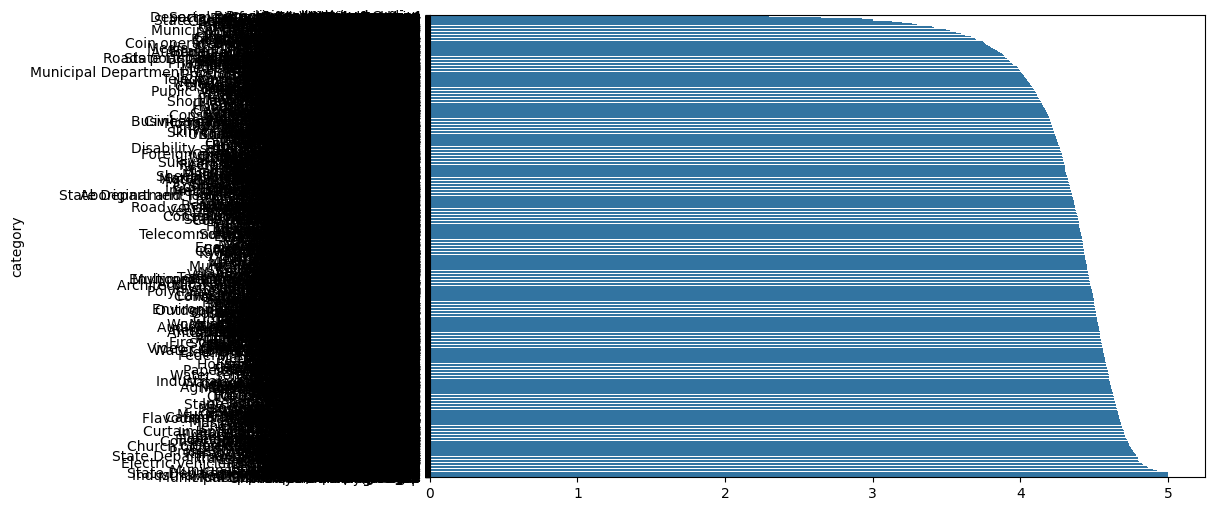

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x=promedios.values,y=promedios.index)

In [23]:
df2=pd.read_pickle(r'Datasets\Yelp\business.pkl')

In [24]:
df3=pd.DataFrame()

In [25]:
df3=df2['name'].isin(df['name'])